# Pandas
## DataFrame
Pandas handles tabular data as a dictionary in Python. A dataframe is a 2-demensional data structure that can stores data in different types 

In [5]:

import pandas as pd

data = pd.DataFrame(
    {
    "Name": [
        "Braund, Mr. Owen Harris",
        "Allen, Mr. William Henry",
        "Bonnell, Miss. Elizabeth",
    ],
    "Age": [22, 35, 58],
    "Sex": ["male", "male", "female"],
}
)
print(data,type(data),sep="\n")



                       Name  Age     Sex
0   Braund, Mr. Owen Harris   22    male
1  Allen, Mr. William Henry   35    male
2  Bonnell, Miss. Elizabeth   58  female
<class 'pandas.core.frame.DataFrame'>


## Series
Each column in a DataFrame is a Series which is like the value of the key in dictionary

In [6]:
age = data['Age']
print(age, type(age),sep="\n")

age = pd.Series([22,35,28],name="Age")
print(age, type(age),sep="\n")


0    22
1    35
2    58
Name: Age, dtype: int64
<class 'pandas.core.series.Series'>
0    22
1    35
2    28
Name: Age, dtype: int64
<class 'pandas.core.series.Series'>


a lot of funcitons can be applies both on DataFrame and Series

In [7]:
# max function actually words for the int values, we get a Series by using dataframe[]
# in this Series which contains a list of int values

print(data['Age'].max())

# Locate the numerical value columns and show some basic statistics
age.describe()
data.describe()

58


,Age
count,3.000000
mean,38.333333
std,18.230012
min,22.000000
25%,28.500000
50%,35.000000
75%,46.500000
max,58.000000


## Read and wite a tubular data

In [8]:
titanic = pd.read_csv("titanic.csv")

# first n rows of a DataFrame, tail for last
titanic.head(8)
# to chech the attribute datatype of each column. Object are strings
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Format transform
`.to_*(path2save,sheet_name,index...)` Index will create a column in the left to record each row, if we enable sheet_name, will do not need index, cause it will do his job

In [9]:
titanic.to_excel("titanic.xlsx",sheet_name="passengers",index=False)

titanic = pd.read_excel("titanic.xlsx",sheet_name="passengers")

In [10]:
titanic.head()
# A technical summary 
titanic.info()
titanic['Age'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


## Select subset
### attributes of both DataFrame and Series
- shape (A Pandas Series is one-dimensinal and only the number of rows is returned)
### Methods
- `reset_index(drop=True)` reset index for each subset

In [11]:
titanic['Age'].shape
# to select a sub DataFrame [[]]
age_sex = titanic[['Age','Sex']]
print(age_sex.head(),age_sex.shape,type(age_sex),sep="\n")

    Age     Sex
0  22.0    male
1  38.0  female
2  26.0  female
3  35.0  female
4  35.0    male
(891, 2)
<class 'pandas.core.frame.DataFrame'>


### Select specific rows
`DataFrame[DataFrame['column'] conditional expresion]` The output is Series of boolean values withe the **same number** of rows in the original df, only rows for which the value if True will be selected
expression `titanic['Age'] > 35` will return a boolean mask like this `0 False 1 True...` of all rows, like a dict. Then `titanic[boolean_mask]` will get the rows of index only the value is True 

In [12]:
above_35 = titanic[titanic['Age'] > 35]
above_35.shape
class_2_3 = titanic[titanic['Pclass'].isin([2,3])]
class_2_3.shape

(675, 12)

## Use sql queries in Pandas
`SELECT COUNT(*) FROM titanic` = `len(titanic)`
`SELECT Sex FROM titanic` = `titanic["Sex"]`
`SELECT * FROM titanic WHERE Sex = "female"` = `titanic[titanic["Sex"] =="female"]`
`SELECT Age FROM titanic WHERE Sex = "female"` = `titanic[titanic["Sex"] == "female"]["Age"]`
`SELECT * FROM titanic ORDER BY Age DESC;` = `titanic.sort_values(by="Age",ascending=False)`
`SELECT AVG(age) FROM titanic where Sex = "male"` = `titanic[titanic["Sex"]=="male"]["Age"].mean()`
`SELECT count(*) FROM titanic WHERE Sex = "female"` = `len(titanic[titanic["Sex"]=="female"])`
`SELECT pclass, mean(age) from titanic GROUP BY pclass` = `titanic.groupby("Pclass")["Age"].mean()`

109 233


<BarContainer object of 2 artists>

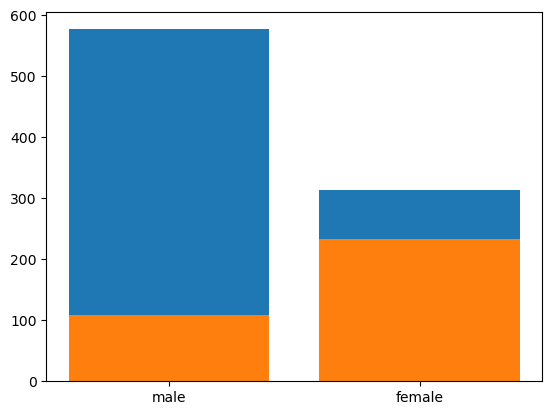

In [59]:
import matplotlib.pyplot as pyplot
# survivied:1 

pyplot.bar(["male","female"],[len(titanic[titanic["Sex"]=="male"]),len(titanic[titanic["Sex"]=="female"])])
survivors_male = titanic[(titanic["Sex"]=="male") & (titanic["Survived"] ==1)]["Sex"].count()
survivors_female = titanic[(titanic["Sex"]=="female") & (titanic["Survived"] ==1)]["Sex"].count()
print(survivors_male,survivors_female)
pyplot.bar(["male","female"],[survivors_male,survivors_female])

In [ ]:
a = titanic[titanic["Sex"] =="female"]
print("a select * where sex is female", a.shape,sep="\n")
a_age = titanic[titanic["Sex"] == "female"]["Age"]
print("a select age",a_age,sep="\n")

b = titanic["Sex"]
print("b select sex",b)

c = titanic.sort_values(by="Age",ascending=False)
print("c order by age desc",c["Age"],sep="\n")

d = titanic[titanic["Sex"]=="male"]["Age"].mean()
print("d select mean age",d,sep="\n")

e = titanic.groupby("Pclass")["Age"].mean()
print("e select pclass and mean age groupby pclass",e,sep="\n")

a
(314, 12)
a select age
1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
880    25.0
882    22.0
885    39.0
887    19.0
888     NaN
Name: Age, Length: 314, dtype: float64
b select sex 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object
c order by age desc
630    80.0
851    74.0
493    71.0
96     71.0
116    70.5
       ... 
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: Age, Length: 891, dtype: float64
d select mean age
30.72664459161148
e select pclass and mean age groupby pclass
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64
